## Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

### Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:

### 1. Загрузите файл HR.csv в pandas dataframe

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [61]:
def base_statistics(data):
    print('Среднеарифметическое:', sum(data) / len(data))
    print('Медиана:', data.median())
    print('Мода:', data.mode()[0])
    print('Минимум:', data.min())
    print('Максимум:', data.max())
    print('СКО:', data.std())

#оставляем только количественные величины
df_variables = df[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","left","promotion_last_5years"]]
for c in df_variables.columns:
    print('Столбец: ', c)
    print(base_statistics(df[c]))
    print('')

Столбец:  satisfaction_level
Среднеарифметическое: 0.6128335222348166
Медиана: 0.64
Мода: 0.1
Минимум: 0.09
Максимум: 1.0
СКО: 0.2486306510611418
None

Столбец:  last_evaluation
Среднеарифметическое: 0.7161017401159978
Медиана: 0.72
Мода: 0.55
Минимум: 0.36
Максимум: 1.0
СКО: 0.17116911062327592
None

Столбец:  number_project
Среднеарифметическое: 3.80305353690246
Медиана: 4.0
Мода: 4
Минимум: 2
Максимум: 7
СКО: 1.2325923553183857
None

Столбец:  average_montly_hours
Среднеарифметическое: 201.0503366891126
Медиана: 200.0
Мода: 135
Минимум: 96
Максимум: 310
СКО: 49.943099371284305
None

Столбец:  time_spend_company
Среднеарифметическое: 3.498233215547703
Медиана: 3.0
Мода: 3
Минимум: 2
Максимум: 10
СКО: 1.4601362305354546
None

Столбец:  Work_accident
Среднеарифметическое: 0.1446096406427095
Медиана: 0.0
Мода: 0
Минимум: 0
Максимум: 1
СКО: 0.3517185523801279
None

Столбец:  left
Среднеарифметическое: 0.2380825388359224
Медиана: 0.0
Мода: 0
Минимум: 0
Максимум: 1
СКО: 0.425924099380363
N

### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [62]:
corr_matrix = df_variables.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

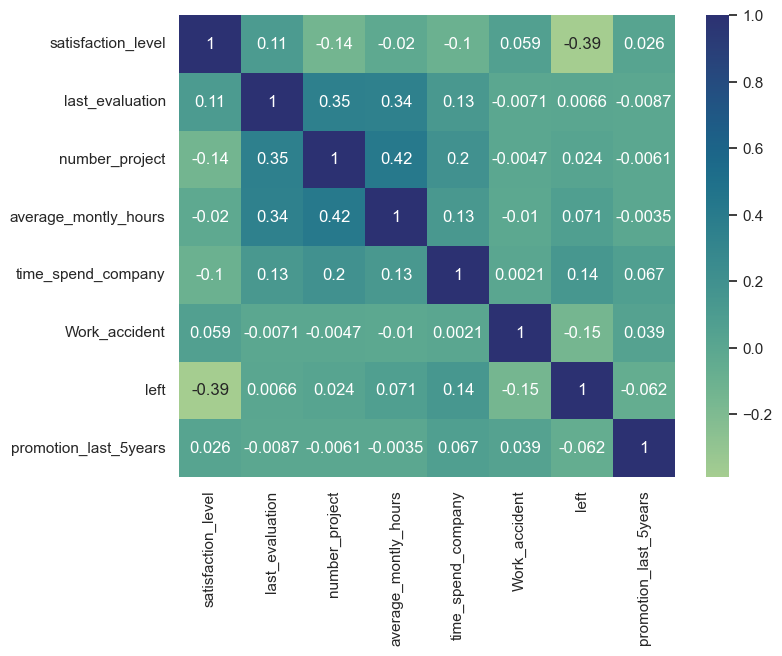

In [63]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(df_variables.corr(), annot=True, cmap='crest')

In [64]:
max_corr = abs(corr_matrix.replace(1,0)).max().max()
min_corr = abs(corr_matrix).min().min()

flag_max = 1
flag_min = 1

for c in corr_matrix.columns:
    for s in corr_matrix.columns:
        if (abs(corr_matrix[c][s]) == max_corr and flag_max):
            flag_max = 0
            print('Наиболее скоррелированные переменные: ', c, ' и ', s)
        if (abs(corr_matrix[c][s]) == min_corr and flag_min):
            flag_min = 0
            print('Наименее скоррелированные переменные: ', c, ' и ', s)

Наиболее скоррелированные переменные:  number_project  и  average_montly_hours
Наименее скоррелированные переменные:  time_spend_company  и  Work_accident


### 4. Рассчитайте сколько сотрудников работает в каждом департаменте

In [65]:
df.groupby('department').size()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

### 5. Показать распределение сотрудников по зарплатам

In [66]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [67]:
df.pivot_table(index='department', columns='salary', aggfunc='size')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [72]:
salary_low = df[df['salary'] == 'low']['average_montly_hours']
salary_high = df[df['salary'] == 'high']['average_montly_hours']

# H0 - сотрудники с высоким окладом проводят на работе столько же времени, как и сотрудники с низким окладом
# H1 - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

stat, p = stats.ttest_ind(salary_low, salary_high, equal_var=False)

if p < 0.05:
    print('Отклоняем нулевую гипотезу')
    print('Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Не отклоняем нулевую гипотезу')
    print('Сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом')

Не отклоняем нулевую гипотезу
Сотрудники с высоким окладом проводят на работе столько же времени, сколько и сотрудники с низким окладом


### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [79]:
working = df[(df['left'] == 0)]
retired =  df[(df['left'] == 1)]

print('Доля получивших повышение за последние 5 лет:')
print('Среди уволившихся - ', round(retired['promotion_last_5years'].value_counts(normalize=True)[1], 3))
print('Среди не уволившихся - ', round(working['promotion_last_5years'].value_counts(normalize=True)[1], 3))

print('\nСредняя степень удовлетворенности:')
print('Среди уволившихся - ', round(retired['satisfaction_level'].mean(), 3))
print('Среди не уволившихся - ', round(working['satisfaction_level'].mean(), 3))

print('\nСреднее количество проектов:')
print('Среди уволившихся - ', round(retired['number_project'].mean(), 3))
print('Среди не уволившихся - ', round(working['number_project'].mean(), 3))

Доля получивших повышение за последние 5 лет:
Среди уволившихся -  0.005
Среди не уволившихся -  0.026

Средняя степень удовлетворенности:
Среди уволившихся -  0.44
Среди не уволившихся -  0.667

Среднее количество проектов:
Среди уволившихся -  3.856
Среди не уволившихся -  3.787
